In [1]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.66
    Uninstalling langchain-core-0.3.66:
      Successfully uninstalled langchain-core-0.3.66


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.1 MB/s eta 0:00:00


In [10]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get("langsmith_api_key")
print(groq_api_key)
print(langsmith)

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
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


In [11]:
import os
os.environ["LANGCHAIN_API_KEY"]=langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [12]:
from langchain_groq import ChatGroq

In [28]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x784b6d1add50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x784b6d7fded0>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

## ChatBot using Langgraph

In [29]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [30]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)
graph_builder

In [31]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [32]:
graph_builder.add_node("chatbot",chatbot)

In [33]:
graph_builder

In [34]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

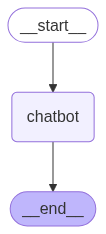

In [35]:
graph = graph_builder.compile()
graph

In [36]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("good Bye")
    break
  for event in graph.stream({'messages': ("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value["messages"].content)

User: hellp
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊  \n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.030909091, 'prompt_time': 0.00190732, 'queue_time': 0.166453302, 'total_time': 0.032816411}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--f3ef88d1-18ec-484c-b270-8c45399a4582-0', usage_metadata={'input_tokens': 11, 'output_tokens': 17, 'total_tokens': 28})}])
content='Hello! 👋  How can I help you today? 😊  \n\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.030909091, 'prompt_time': 0.00190732, 'queue_time': 0.166453302, 'total_time': 0.032816411}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--f3ef8